# Estimation of Obesity Levels Based On Eating Habits and Physical Condition

- **Authors:**

    - Bitewulign Kassa Mekonnen
    - Yalda Rahmati
    - Richard (Rick) Harkness
    - Gulrukh Aqeel
    - Kate Antonova

- **Technical Facilitator:**

    - Phil Van-Lane(he/him) phil.vanlane@mail.utoronto.ca
- **Learning Support Staff:**

    - Aditya Kulkarni (he/him) aditya.kulkarni@mail.utoronto.ca
    - Farzaneh Hashemi (she/her) fhashemi.ma@gmail.com
    - Sergii Khomych (he/him) svkhomich1@gmail.com



In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import label_binarize
%matplotlib inline
import time
from PIL import Image
from scipy import stats

### read the raw data

In [40]:
data = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')
# Create a copy
df = data.copy()
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Basic information about the raw data

In [41]:
print(f'\nRaw Dataset Basic Information:')
print(f'\nRaw Dataset Shape {df.shape}')
print(f'\nColumns: {list(df.columns)}')
print(f'\ndata type:\n {df.dtypes}')


Raw Dataset Basic Information:

Raw Dataset Shape (2111, 17)

Columns: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

data type:
 Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


**The public dataset in this study has 17 variables, explained below:**

1. **Gender:** data type = categorical -> male,  female

2. **Age:** data type = numeric 

3. **Height (in meters):** data type = numeric

4. **Weight (in kilograms):** data type = numeric

5. **Family history of overweight:** data type = categorical -> yes, no  

6. **FAVC (Frequently consumed high-calorie food):** data type = categorical -> yes or no 

7. **FCVC  (Frequency of consumption of vegetables):** data type = categorical (ordinal)  -> 1 = never, 2 = sometimes, 3 = always

8. **NCP (Number of  main meals):** data type = continous (ordinal) ->  1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer

9. **CAEC (Consumption of food between meals):** data type = categorical (ordinal) -> 1 = no, 2 = sometimes, 3 = frequently, 4 =always

10. **SMOKE:** data type = categorical -> yes or no

11. **CH2O (Consumption of water daily):** data type = continous (ordinal) -> 1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L

12. **SCC (Monitor calorie intake):** data type = categorical -> yes, no

13. **FAE (Frequency of physical activity):** data type = integer (ordinal) -> 1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week 

14. **TUE (Time using electronic devices):** data type = integer? (ordinal) -> 0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours 

15. **CALC (Consumption of alcohol):** data type = categorical -> 1 = no, 2 = sometimes, 3 = frequently, 4 = always 

16. **MTRANS (Type of transportation used):** data type = categorical -> automobile, motorbike, bike, public transportation, walking 

17. **NObeyesdad (Level of obesity according to body mass index):** data type = categorical -> insufficient weight normal weight, overweight level I, overweight level II, obesity type I, obesity type II, obesity type III)

### Analyse missing Values in the raw dataset
- Identifies and quantifies missing values using `isnull().sum()`
- calculate the percentage of missing values
- ceate a dataframe for `missing values` and `Percentage` columns
- Luckily, the dataset does not contain any missing values

In [42]:
# Check for missing values
print(f'Missing values analysis:\n')
missing_values = df.isnull().sum()
missing_percentage = 100 * missing_values/ len(df)
missing_table = pd.concat([missing_values, missing_percentage], axis = 1, keys = ['Missing values', 'Percentage'])
missing_table

Missing values analysis:



,Missing values,Percentage
Gender,0,0.0
Age,0,0.0
Height,0,0.0
Weight,0,0.0
family_history_with_overweight,0,0.0
FAVC,0,0.0
FCVC,0,0.0
NCP,0,0.0
CAEC,0,0.0
SMOKE,0,0.0


### Analyse dublicates in the raw dataset

In [43]:
# Duplicate Check: The script will output the total number of duplicate rows in the dataset.
# helps identify any potential issues with duplicates or data distribution
duplicates = df.duplicated().sum()
print(f"Total Dublicate  Raws before Dropping: {duplicates}")

Total Dublicate  Raws before Dropping: 24


### Handling dublicates
- The identical raws were removed using `drop_dublicates()`
- The cleaned dataset after dublicate rows dropped were cheched
- The cleaned dataset is saved as `Cleaned_ObesityDataSet_raw_and_data_sinthetic.csv` in `data` directory for further analysis or processing.

In [44]:
# Now drop dublicate rows
df_drop2 = df.drop_duplicates()

# Check the doublicates after dropping
duplicates_after = df_drop2.duplicated().sum()
print(f"Total Duplicate Rows after Dropping: {duplicates_after}")

# Print basic information after dropping
print(f'\nPreprocessed Dataset Basic Information:')
print(f'\nPreprocessed Dataset Shape {df_drop2.shape}')
print(f'\nColumns: {list(df_drop2.columns)}')
print(f'\ndata type:\n {df_drop2.dtypes}')

# save after dropping dublicates to a csv file
df_drop2.to_csv('data/Cleaned_ObesityDataSet_raw_and_data_sinthetic.csv', index = False)

# Create Body Mass Index (BMI) feature
# BMI is calculated using weight and height as weight divided by  height squared
bmi = df_drop2['Weight'] / (df_drop2['Height'] ** 2)
df_bmi = df_drop2.copy()
df_bmi.insert(4, 'BMI', bmi)

# Print basic information after dropping and creating BMI
print(f'\nPreprocessed Dataset including BMI Basic Information:')
print(f'\nPreprocessed with Dataset including BMI Shape {df_bmi.shape}')
print(f'\nColumns with BMI: {list(df_bmi.columns)}')
print(f'\ndata type with BMI:\n {df_bmi.dtypes}')

# save after dropping dublicates and creating BMI to a csv file
df_bmi.to_csv('data/Cleaned_with_BMI_ObesityDataSet_raw_and_data_sinthetic.csv', index = False)

Total Duplicate Rows after Dropping: 0

Preprocessed Dataset Basic Information:

Preprocessed Dataset Shape (2087, 17)

Columns: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

data type:
 Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad   

In [45]:
## Load the cleaned/ Preprocessed dataset

In [46]:
df_cleaned = pd.read_csv('data/Cleaned_ObesityDataSet_raw_and_data_sinthetic.csv')
print(f'\nPreprocessed Dataset Basic Information:')
print(f'\nPreprocessed Dataset Shape {df_cleaned.shape}')
print(f'\nColumns: {list(df_cleaned.columns)}')
print(f'\ndata type:\n {df_cleaned.dtypes}')


Preprocessed Dataset Basic Information:

Preprocessed Dataset Shape (2087, 17)

Columns: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

data type:
 Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: obj

### Generate descriptive statistics for numerical columns
- Summarize statistics for numerical columns
- Mean, median, standard deviation, etc.

In [47]:
print(f'Discriptive statistics:\n')
numerical_cols = df_cleaned.select_dtypes(['float64', 'int64']).columns
df_cleaned[numerical_cols].describe()

Discriptive statistics:



,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Perform correlation analysis for numerical columns

-  Heatmap of correlations between numerical features
- Helps identify relationships between variables

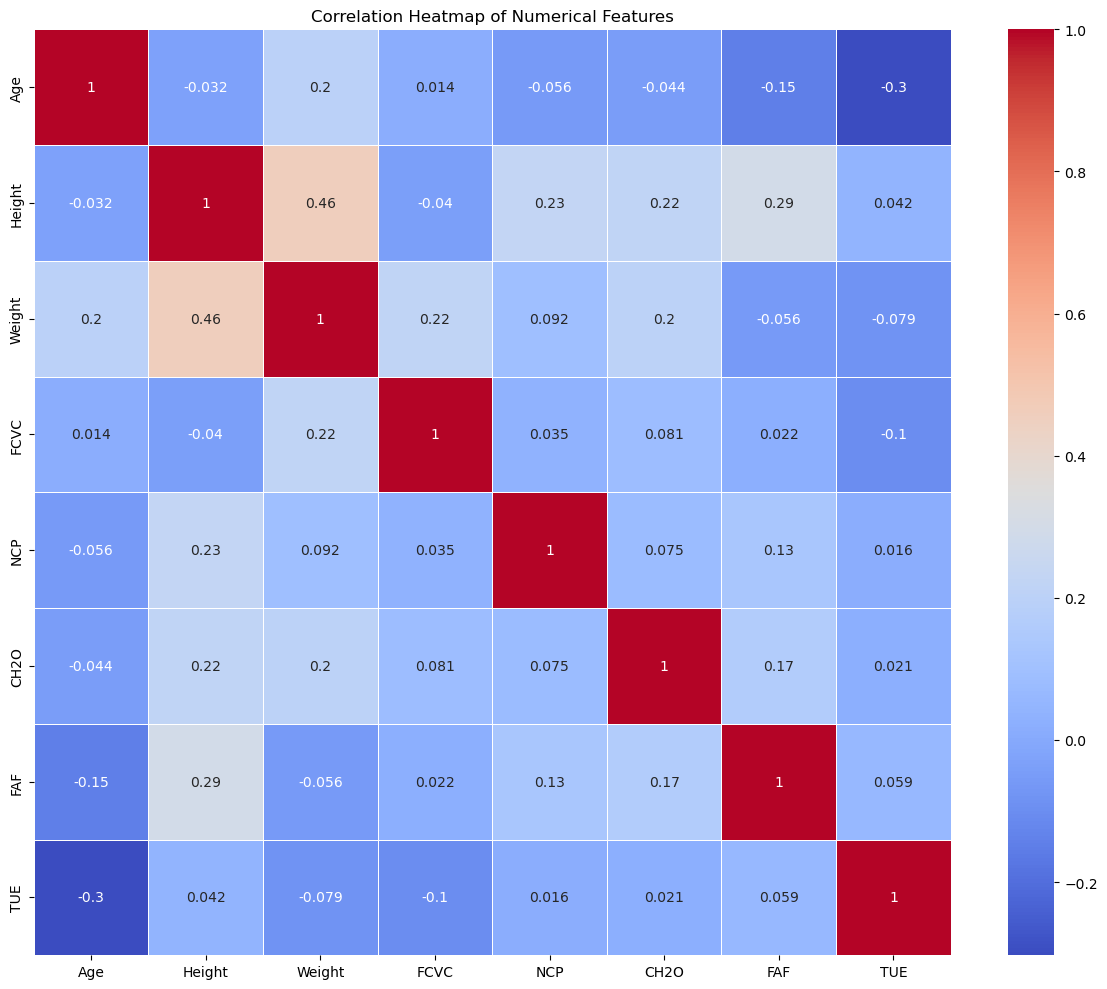

In [48]:
correlation_matrix = df_cleaned[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

### Numerical features distribution analysis
- Histograms with kernel density estimation
- Shows distribution characteristics of numerical features

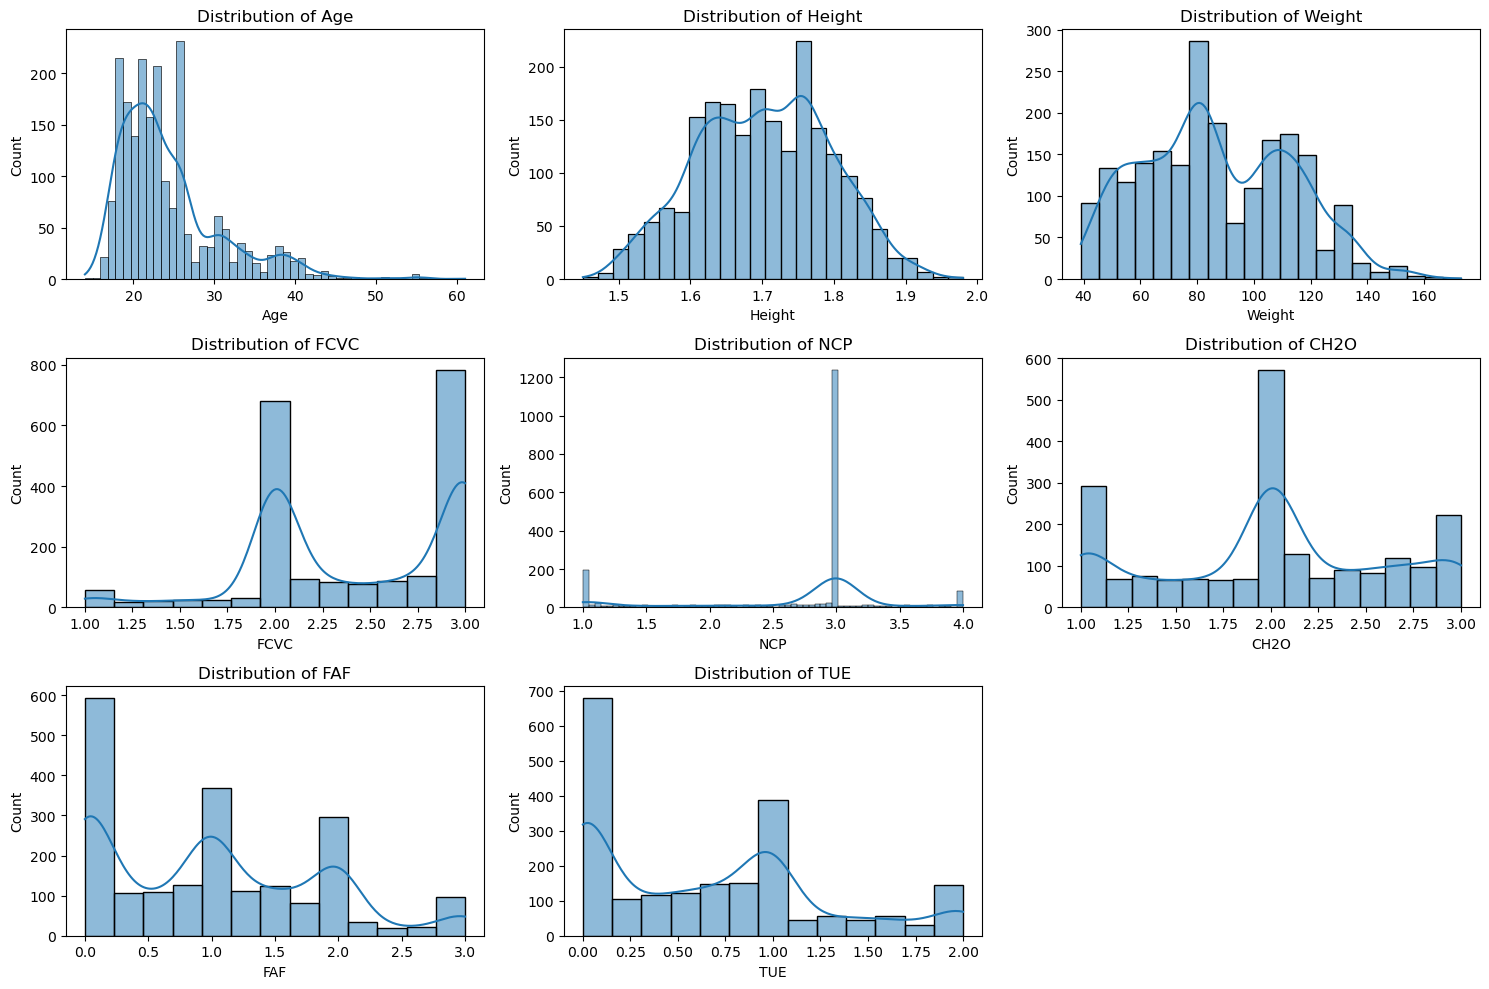

In [49]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Analyse distribution of categorical variables
- Bar plots show the distribution of categorical variables

### Obesity Level Analysis
- Pie chart of obessity level distribution

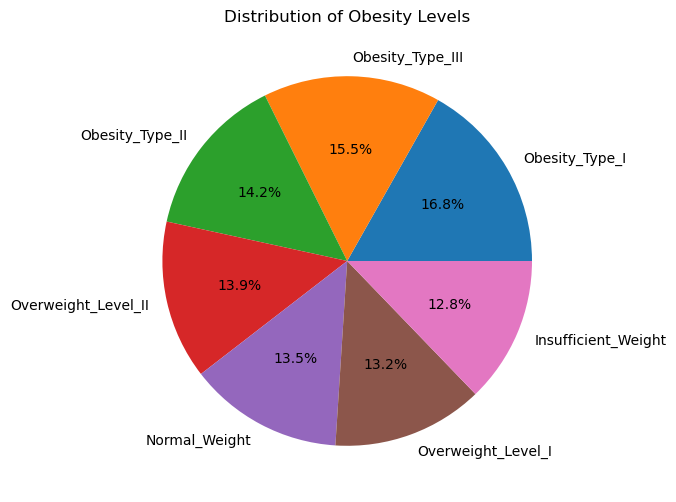

In [51]:
 # Obesity level distributiona
plt.figure(figsize=(10, 6))
obesity_counts = df_cleaned['NObeyesdad'].value_counts()
obesity_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Obesity Levels')
plt.ylabel('')
plt.show()

<Figure size 1000x600 with 0 Axes>

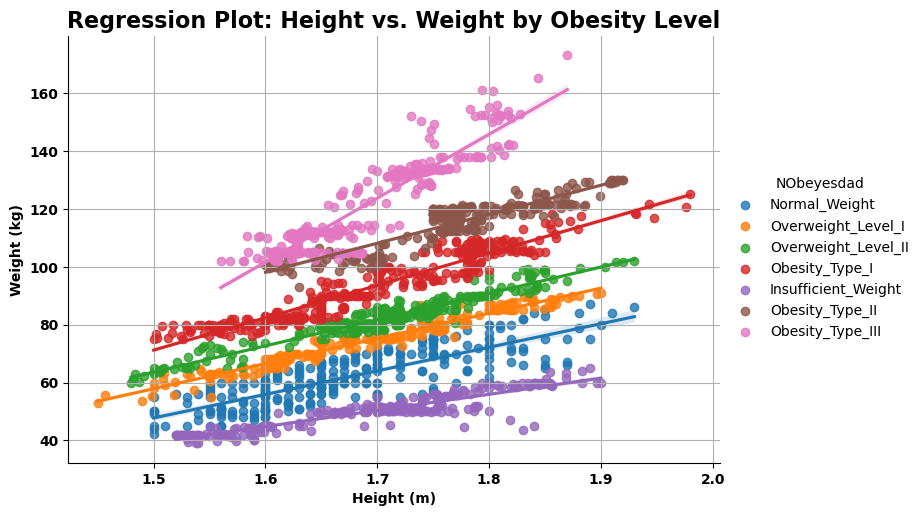

In [52]:
# Plot regression for Height vs. Weight, colored by Obesity Level
plt.figure(figsize=(10, 6))
sns.lmplot(data=df_cleaned, x="Height", y="Weight", hue="NObeyesdad", aspect=1.5, markers="o")

# Customize plot
plt.xlabel("Height (m)", fontweight = 'bold')
plt.ylabel("Weight (kg)", fontweight = 'bold')
plt.title("Regression Plot: Height vs. Weight by Obesity Level", fontweight = 'bold', fontsize = 16)
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.grid()
plt.show()

- To visualize the distribution of numerical and categorical variables in the dataset, box plots are for numerical variables and histograms (or bar plots) for categorical variables. 
- Box plots are effective for identifying outliers and understanding the spread of numerical data, 
- while bar plots are suitable for showing the frequency distribution of categorical data.
- **Here's how you can create these plots for your dataset:**

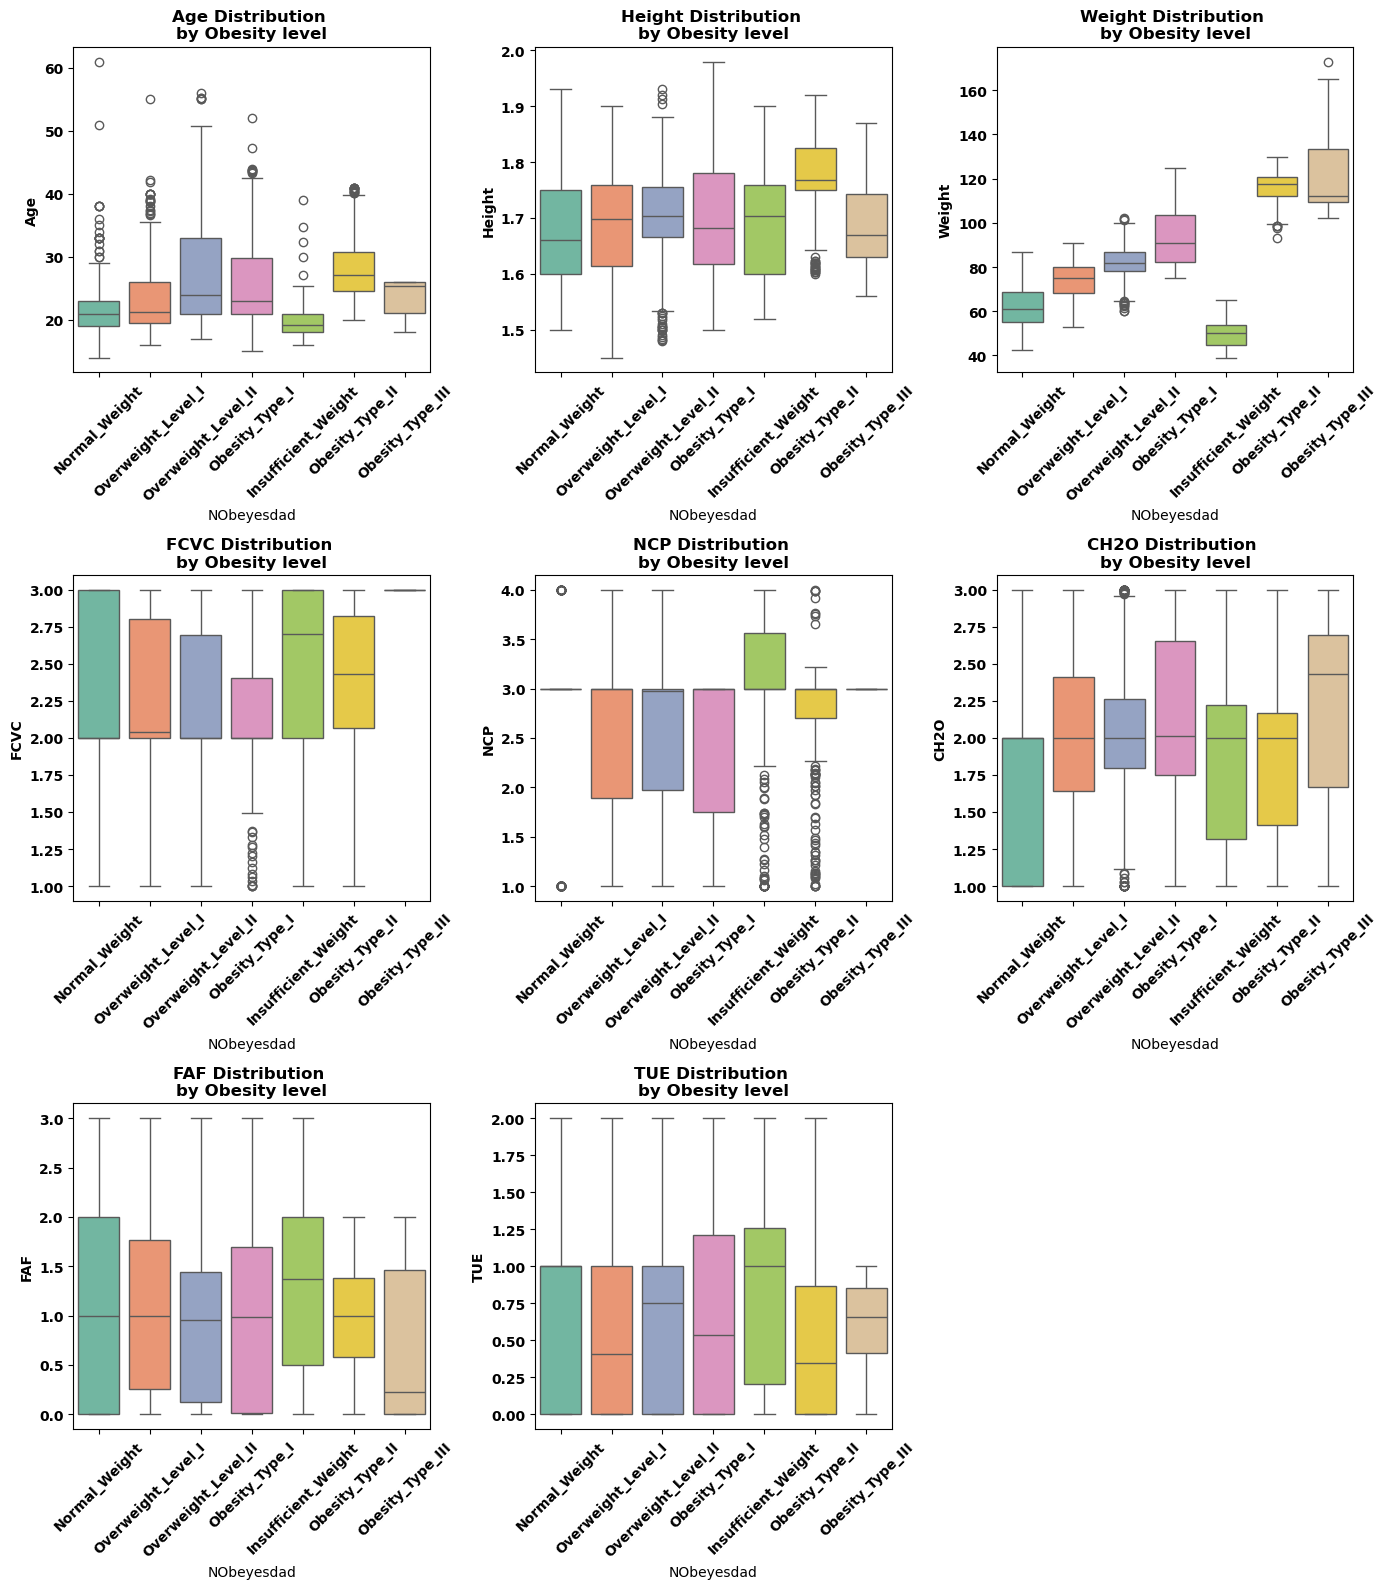

In [70]:
plt.figure(figsize=(14, 16))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x='NObeyesdad', y=col, data=df_cleaned, hue='NObeyesdad', palette='Set2', dodge=False, legend=False)
    plt.title(f'{col} Distribution \nby Obesity level', fontweight='bold')
    plt.xticks(rotation=45, fontweight='bold')  # Rotate x-axis labels
    plt.yticks(fontweight='bold')
    plt.ylabel(col, fontweight = 'bold')
plt.tight_layout()
plt.show()

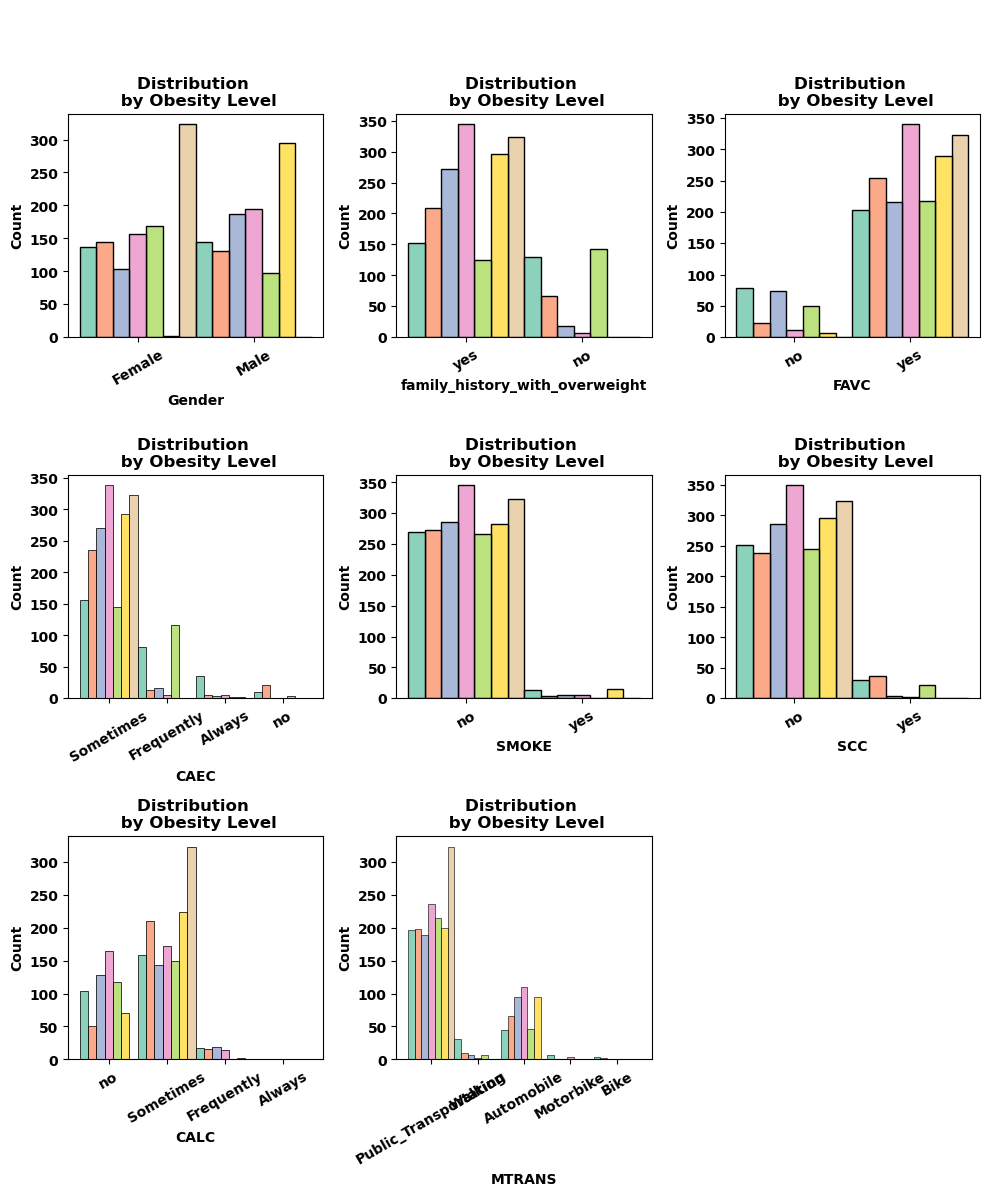

In [ ]:
categorical_cols = df_cleaned.select_dtypes(['object']).columns

# Plot histogram for categorical variables with colors representing Obesity Levels
plt.figure(figsize=(10, 12))
for i, col in enumerate(categorical_cols[:-1], 1):
    ax = plt.subplot(3,3,i)
    handles, labels = ax.get_legend_handles_labels()
    sns.histplot(data=df_cleaned, x=col, hue='NObeyesdad', multiple='dodge', palette='Set2', legend = False)
    plt.title(f'Distribution \n by Obesity Level', fontsize=12, fontweight='bold')
    plt.xticks(rotation=30, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    
# plt.tight_layout()
plt.figlegend(handles, labels, loc='upper center', ncol=3, fontsize=12, frameon=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset 
df = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')

# Selecting relevant features
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
df = df[features]

# Initialize the Dash app
app = dash.Dash(__name__)
server = app.server  # For deployment

# Define app layout
app.layout = html.Div([
    html.H1("Obesity Levels Dashboard", style={'textAlign': 'center', 'fontWeight': 'bold', 'fontSize': 30}),
    
    # Dropdown for selecting a feature
    html.Label("Select a Feature to Visualize Against Obesity Level:", style={'fontWeight': 'bold'}),
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': col, 'value': col} for col in features if col != 'NObeyesdad'],
        value='Age',
        clearable=False
    ),
    
    dcc.Graph(id='visualization-output'),
])

# Define callback to update graph
@app.callback(
    Output('visualization-output', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_graph(selected_feature):
    if selected_feature in ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC']:
        fig = px.box(df, x='NObeyesdad', y=selected_feature, color='NObeyesdad',
                     title=f'Distribution of {selected_feature} Across Obesity Levels')
    else:
        fig = px.histogram(df, x=selected_feature, color='NObeyesdad', barmode='group',
                           title=f'{selected_feature} Distribution by Obesity Level')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8054)